In [ ]:
!pip install timedelta

In [2]:
# Importar as libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import timedelta as td
import datetime
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Ler os dados
BDFULL = pd.read_csv('BaseFULL.csv',delimiter=';')

# Verificar Dimensão
BDFULL.shape

(1007, 3)

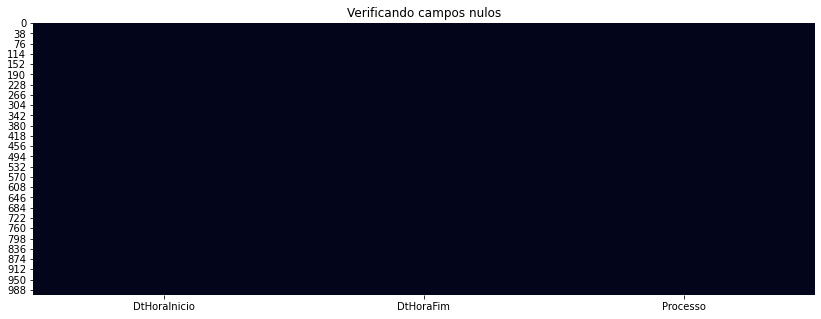

In [4]:
# Nulos Graficos
plt.figure( figsize=(14, 5) )
plt.title('Verificando campos nulos')
sns.heatmap( BDFULL.isnull(), cbar=False );

In [5]:
# campos data estão como object - teremos que transformar para data
BDFULL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DtHoraInicio  1007 non-null   object
 1   DtHoraFim     1007 non-null   object
 2   Processo      1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [6]:
BDFULL.head(2)

,DtHoraInicio,DtHoraFim,Processo
0,05/01/2021 05:21,05/01/2021 07:21,Rotina_01
1,06/01/2021 04:13,06/01/2021 05:32,Rotina_01


In [7]:
# convertendo data do tipo object para DateTime
#BDFULL['DtHoraInicio'] = pd.to_datetime(BDFULL['DtHoraInicio'])
#BDFULL['DtHoraFim'] = pd.to_datetime(BDFULL['DtHoraFim'])
# Este código não funcionou - foi necessário fazer conforme abaixo - avaliar como proceder 

In [8]:
# 05/01/2021 05:21 - base está no formato dia/mes/ano - ao converter para data apresentou problemas - trocou o dia por mês
# Este problema ocorreu nos casos onde o dia estava entre 1 e 12, nos demais casos funcionou
# Neste exemplo era 08/Out e 09 Out, e acabou trocando os dias por meses ==> 2021-08-10 23:37:00 2021-09-10 07:55:00 
print(BDFULL['DtHoraInicio'][0])        # completo
print(BDFULL['DtHoraInicio'][0][0: 2])  # dia
print(BDFULL['DtHoraInicio'][0][3: 5])  # mês
print(BDFULL['DtHoraInicio'][0][6: 10]) # ano
print(BDFULL['DtHoraInicio'][0][-5:])   # hora

# formato aaaa-mm-dd hh:mm
print( BDFULL['DtHoraInicio'][0][6: 10] + '-' + BDFULL['DtHoraInicio'][0][3: 5] + '-' + BDFULL['DtHoraInicio'][0][0: 2] + ' ' + BDFULL['DtHoraInicio'][0][-5:])

05/01/2021 05:21
05
01
2021
05:21
2021-01-05 05:21


In [9]:
 # convertendo data do tipo object para DateTime
for i in range(len(BDFULL.index)):
  BDFULL['DtHoraInicio'][i] = pd.to_datetime(BDFULL['DtHoraInicio'][i][6: 10] + '-' + BDFULL['DtHoraInicio'][i][3: 5] + '-' + BDFULL['DtHoraInicio'][i][0: 2] + ' ' + BDFULL['DtHoraInicio'][i][-5:])
  BDFULL['DtHoraFim'][i] =    pd.to_datetime(BDFULL['DtHoraFim'][i][6: 10] + '-' + BDFULL['DtHoraFim'][i][3: 5] + '-' + BDFULL['DtHoraFim'][i][0: 2] + ' ' + BDFULL['DtHoraFim'][i][-5:])



In [10]:
BDFULL.head(2)

,DtHoraInicio,DtHoraFim,Processo
0,2021-01-05 05:21:00,2021-01-05 07:21:00,Rotina_01
1,2021-01-06 04:13:00,2021-01-06 05:32:00,Rotina_01


In [11]:
BDFULL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DtHoraInicio  1007 non-null   object
 1   DtHoraFim     1007 non-null   object
 2   Processo      1007 non-null   object
dtypes: object(3)
memory usage: 23.7+ KB


In [12]:
# Valores Únicos
BDFULL['Processo'].unique()

array(['Rotina_01', 'Rotina_02', 'Rotina_03', 'Rotina_04'], dtype=object)

In [13]:
# Valores Unicos - Rank
BDFULL['Processo'].value_counts()

Rotina_02    299
Rotina_03    246
Rotina_04    244
Rotina_01    218
Name: Processo, dtype: int64

In [14]:
# Valores Unicos - Rank - Composição por percentual
BDFULL['Processo'].value_counts(normalize=True)*100

Rotina_02    29.692155
Rotina_03    24.428997
Rotina_04    24.230387
Rotina_01    21.648461
Name: Processo, dtype: float64

In [15]:
# Colunas estão como texto, tem que virar data/hora
BDFULL[BDFULL["Processo"]=="Rotina_01"].sort_values(by=["DtHoraInicio"], ascending=True).head(5)

,DtHoraInicio,DtHoraFim,Processo
0,2021-01-05 05:21:00,2021-01-05 07:21:00,Rotina_01
1,2021-01-06 04:13:00,2021-01-06 05:32:00,Rotina_01
2,2021-01-07 03:30:00,2021-01-07 05:12:00,Rotina_01
3,2021-01-08 03:19:00,2021-01-08 04:57:00,Rotina_01
4,2021-01-09 03:27:00,2021-01-09 05:15:00,Rotina_01


In [16]:
# Inclui coluna com tempo em minutos
BDFULL['TempoMinutos']=0
for i in range(len(BDFULL.index)):
    #print( BDFULL["DtHoraInicio"][i], BDFULL["DtHoraFim"][i], td.Timedelta(BDFULL["DtHoraFim"][i] - BDFULL["DtHoraInicio"][i]).total.minutes)
    BDFULL['TempoMinutos'][i] = td.Timedelta(BDFULL["DtHoraFim"][i] - BDFULL["DtHoraInicio"][i]).total.minutes


In [17]:
BDFULL.head(5)

,DtHoraInicio,DtHoraFim,Processo,TempoMinutos
0,2021-01-05 05:21:00,2021-01-05 07:21:00,Rotina_01,120
1,2021-01-06 04:13:00,2021-01-06 05:32:00,Rotina_01,79
2,2021-01-07 03:30:00,2021-01-07 05:12:00,Rotina_01,102
3,2021-01-08 03:19:00,2021-01-08 04:57:00,Rotina_01,98
4,2021-01-09 03:27:00,2021-01-09 05:15:00,Rotina_01,108


In [18]:
# Visualizando Início e Fim dos lançamentos
for i in range(len(BDFULL.index)):
     print("Processo: " + BDFULL["Processo"][i] + "  - Início: " + str(BDFULL["DtHoraInicio"][i]) + "  -  " + "Fim: " + str(BDFULL["DtHoraFim"][i]))
     print("Tempo: ", BDFULL["DtHoraFim"][i] - BDFULL["DtHoraInicio"][i], " Tempo em minutos: " , BDFULL["TempoMinutos"][i] )    
     print("")
     print("") 

Processo: Rotina_01  - Início: 2021-01-05 05:21:00  -  Fim: 2021-01-05 07:21:00
Tempo:  0 days 02:00:00  Tempo em minutos:  120


Processo: Rotina_01  - Início: 2021-01-06 04:13:00  -  Fim: 2021-01-06 05:32:00
Tempo:  0 days 01:19:00  Tempo em minutos:  79


Processo: Rotina_01  - Início: 2021-01-07 03:30:00  -  Fim: 2021-01-07 05:12:00
Tempo:  0 days 01:42:00  Tempo em minutos:  102


Processo: Rotina_01  - Início: 2021-01-08 03:19:00  -  Fim: 2021-01-08 04:57:00
Tempo:  0 days 01:38:00  Tempo em minutos:  98


Processo: Rotina_01  - Início: 2021-01-09 03:27:00  -  Fim: 2021-01-09 05:15:00
Tempo:  0 days 01:48:00  Tempo em minutos:  108


Processo: Rotina_01  - Início: 2021-01-12 05:14:00  -  Fim: 2021-01-12 07:27:00
Tempo:  0 days 02:13:00  Tempo em minutos:  133


Processo: Rotina_01  - Início: 2021-01-13 03:16:00  -  Fim: 2021-01-13 04:20:00
Tempo:  0 days 01:04:00  Tempo em minutos:  64


Processo: Rotina_01  - Início: 2021-01-14 05:02:00  -  Fim: 2021-01-14 06:14:00
Tempo:  0 day

Tempo:  0 days 00:20:00  Tempo em minutos:  20


Processo: Rotina_02  - Início: 2021-05-26 06:37:00  -  Fim: 2021-05-26 07:14:00
Tempo:  0 days 00:37:00  Tempo em minutos:  37


Processo: Rotina_02  - Início: 2021-05-27 00:13:00  -  Fim: 2021-05-27 00:32:00
Tempo:  0 days 00:19:00  Tempo em minutos:  19


Processo: Rotina_02  - Início: 2021-05-27 04:34:00  -  Fim: 2021-05-27 05:17:00
Tempo:  0 days 00:43:00  Tempo em minutos:  43


Processo: Rotina_02  - Início: 2021-05-28 04:48:00  -  Fim: 2021-05-28 05:38:00
Tempo:  0 days 00:50:00  Tempo em minutos:  50


Processo: Rotina_02  - Início: 2021-05-29 00:14:00  -  Fim: 2021-05-29 00:28:00
Tempo:  0 days 00:14:00  Tempo em minutos:  14


Processo: Rotina_02  - Início: 2021-05-29 06:11:00  -  Fim: 2021-05-29 07:13:00
Tempo:  0 days 01:02:00  Tempo em minutos:  62


Processo: Rotina_02  - Início: 2021-06-01 00:14:00  -  Fim: 2021-06-01 01:02:00
Tempo:  0 days 00:48:00  Tempo em minutos:  48


Processo: Rotina_02  - Início: 2021-06-01 07:33:

Tempo:  0 days 05:10:00  Tempo em minutos:  310


Processo: Rotina_03  - Início: 2021-09-23 19:22:00  -  Fim: 2021-09-23 23:08:00
Tempo:  0 days 03:46:00  Tempo em minutos:  226


Processo: Rotina_03  - Início: 2021-09-24 19:19:00  -  Fim: 2021-09-24 23:05:00
Tempo:  0 days 03:46:00  Tempo em minutos:  226


Processo: Rotina_03  - Início: 2021-09-27 19:32:00  -  Fim: 2021-09-27 23:26:00
Tempo:  0 days 03:54:00  Tempo em minutos:  234


Processo: Rotina_03  - Início: 2021-09-28 19:22:00  -  Fim: 2021-09-28 23:09:00
Tempo:  0 days 03:47:00  Tempo em minutos:  227


Processo: Rotina_03  - Início: 2021-09-29 19:20:00  -  Fim: 2021-09-29 22:39:00
Tempo:  0 days 03:19:00  Tempo em minutos:  199


Processo: Rotina_03  - Início: 2021-09-30 19:23:00  -  Fim: 2021-09-30 22:58:00
Tempo:  0 days 03:35:00  Tempo em minutos:  215


Processo: Rotina_03  - Início: 2021-10-01 19:19:00  -  Fim: 2021-10-01 22:58:00
Tempo:  0 days 03:39:00  Tempo em minutos:  219


Processo: Rotina_03  - Início: 2021-10-0

In [19]:
BDFULL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   DtHoraInicio  1007 non-null   object
 1   DtHoraFim     1007 non-null   object
 2   Processo      1007 non-null   object
 3   TempoMinutos  1007 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 31.6+ KB


In [20]:
BDFULL['Mes']= pd.to_datetime(BDFULL['DtHoraInicio']).dt.month

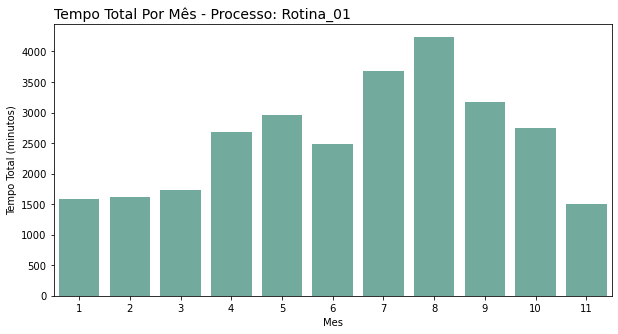

In [21]:
# Tamanho da imagem
plt.figure( figsize=(10, 5) )

# Titulo
plt.title('Tempo Total Por Mês - Processo: Rotina_01', loc='left', fontsize=14 )

# Grafico Rotina 01
sns.barplot( data=BDFULL[BDFULL['Processo']=='Rotina_01'], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )




# Label
plt.ylabel('Tempo Total (minutos)');

<AxesSubplot:xlabel='Mes', ylabel='TempoMinutos'>

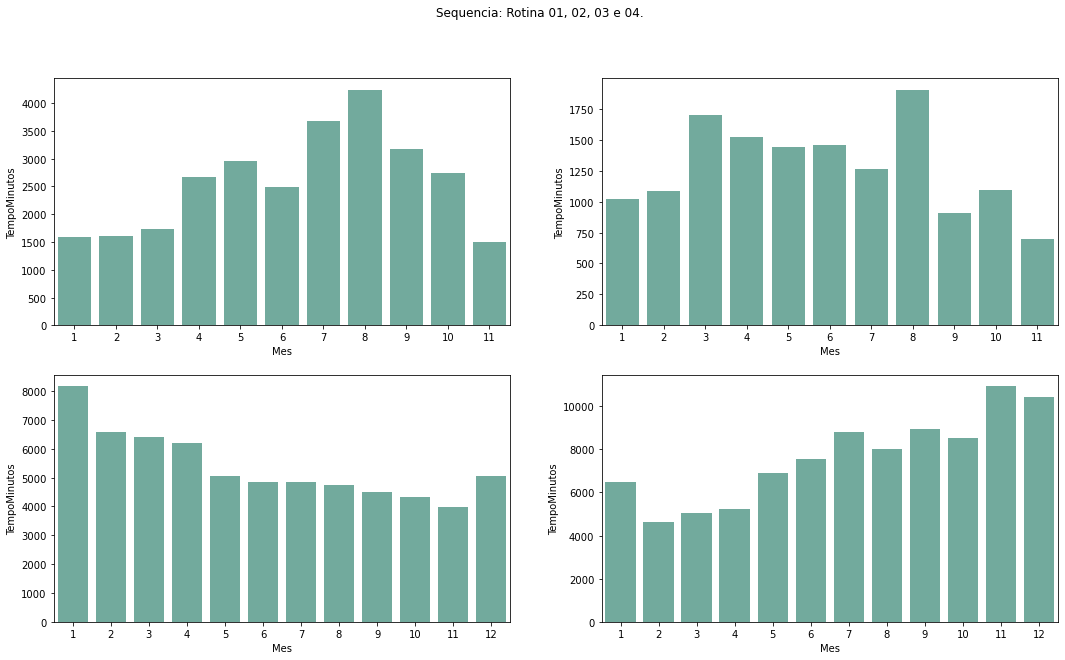

In [33]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))
fig.suptitle('Sequencia: Rotina 01, 02, 03 e 04.')

# Grafico Rotina 01
sns.barplot(ax=axes[0, 0], data=BDFULL[BDFULL['Processo']=='Rotina_01'], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 02
sns.barplot(ax=axes[0, 1], data=BDFULL[BDFULL['Processo']=='Rotina_02'], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 03
sns.barplot(ax=axes[1, 0], data=BDFULL[BDFULL['Processo']=='Rotina_03'], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )

# Grafico Rotina 04
sns.barplot(ax=axes[1, 1], data=BDFULL[BDFULL['Processo']=='Rotina_04'], x='Mes' , y='TempoMinutos', ci=None, color='#69b3a2', estimator=sum )


In [ ]:
# BDFULL.drop(['a'], axis=1, inplace=True)

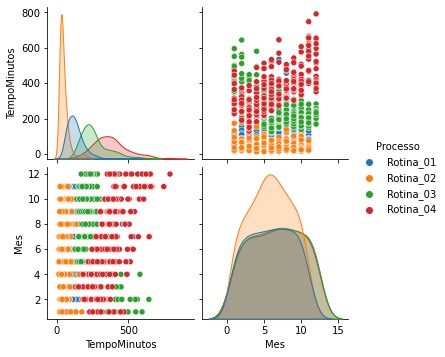

In [24]:
sns.pairplot(BDFULL, hue='Processo', size=2.5);